<a href="https://colab.research.google.com/github/girirajbidwai/machine-learning-projects/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [81]:
#!pip install matplotlib.pyplot
#import matplotlib.pyplot
#!pip install sklearn.model_selection
#import sklearn.model_selection
!pip install train_test_spilt
from sklearn.model_selection import train_test_split

ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
ERROR: Could not find a version that satisfies the requirement train_test_spilt (from versions: none)
ERROR: No matching distribution found for train_test_spilt


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [23]:
#loading data to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [24]:
#print  first 5 rows of dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [25]:
#print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [26]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [27]:
#getting some basics information of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [29]:
#checking number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [30]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation


In [32]:
correlation = gold_data.corr()

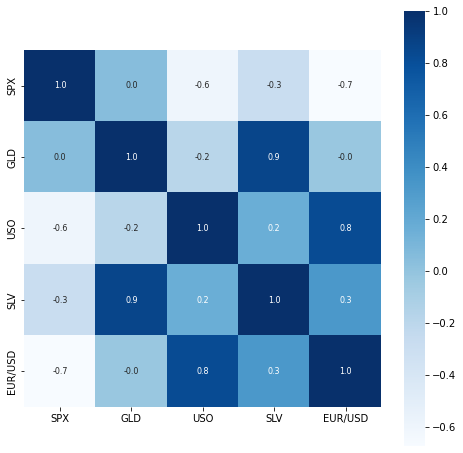

In [79]:
#Constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [44]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


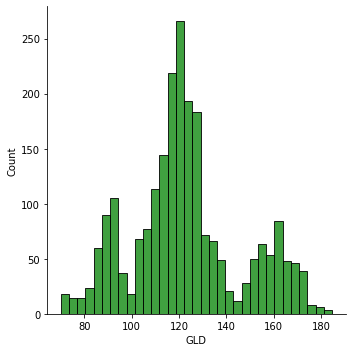

In [66]:
#checking the value of the GLD price
sns.displot(gold_data['GLD'], color='green')

Spilting the features and target

In [47]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [53]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

Model Training:Random Forest Regressor

In [61]:
regressor = RandomForestRegressor(n_estimators=100)


In [54]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [55]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [84]:
print(test_data_prediction)

[113.20720036 147.4811011  139.19329827 112.69740205 113.83849943
  95.57569946 111.81609994  93.36369951 120.86610112 127.0820996
 147.63079937 120.63219893 119.09940052  88.27670089  96.13860011
  92.74689853 116.90930099  89.03039897 125.41630084 114.76979976
 118.89549985 152.63080206 122.85129807 119.99839998 171.26589984
 108.57829833 120.38310049  87.16519827  88.05430068  88.5081991
 121.24860079 154.25080176 150.7031987  125.91909995 126.71280039
  91.14529866 159.84389912 121.44660179 106.57470054 144.01709717
  92.50509952 127.69650077 117.56910075 152.54610167 119.4078995
  91.33140192  80.21750015 120.31620159 132.17070052 119.00849939
 127.16760092 165.80479961 152.99940009  92.67579932 149.16060097
 152.13659884 113.03209996 112.75850044  87.27889937 127.77749889
 125.03790062 151.57800266 114.48889998 110.67330009 160.91449753
 117.28249877 108.14050093 131.74779972 132.31260185 125.22540019
 116.91959985 149.6068029  155.90290087 169.07999536 110.25110092
 140.38849754

In [58]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.98793626105281


Compare actual values and predicted value in a plot

In [ ]:
Y_test = list()

In [ ]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()